### Análise de Séries Temporais em Python

Problema de Negócio:

Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas em Janeiro/2024?

In [1]:
# Versão Ptyhon
from platform import python_version
print('Versão Ppython: ', python_version())

Versão Ppython:  3.10.12


In [2]:
# Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

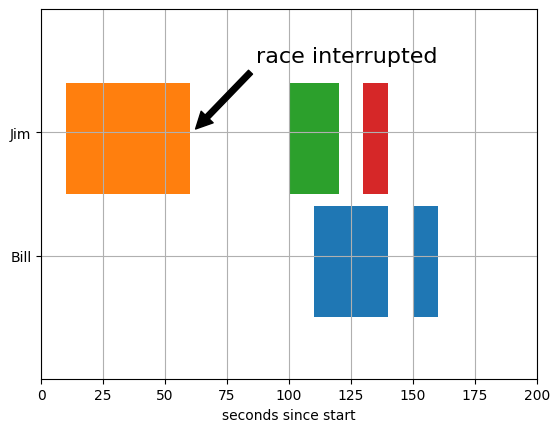

In [3]:
# Horizontal bar plot with gaps
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

### Carregando os dados

In [4]:
# Carrega do Dataset
df_dsa = pd.read_csv('dataset.csv')

In [5]:
df_dsa.shape

(365, 2)

In [6]:
df_dsa.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [7]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [8]:
df_dsa.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


### Pré processamento dos dados

In [9]:
# Valor mmínimo  da coluna data
df_dsa['Data'].min()

'2023-01-01'

In [10]:
# Valor máximo da coluna daeta
df_dsa['Data'].max()

'2023-12-31'

In [11]:
# Converte a coluna de data em tipe datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [12]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [13]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [14]:
# convertender o dataFrame em uma sério temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [15]:
type(serie_temporal)

pandas.core.series.Series

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [17]:
# Fornece a freQuencia da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [18]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

### Análise Exploratória

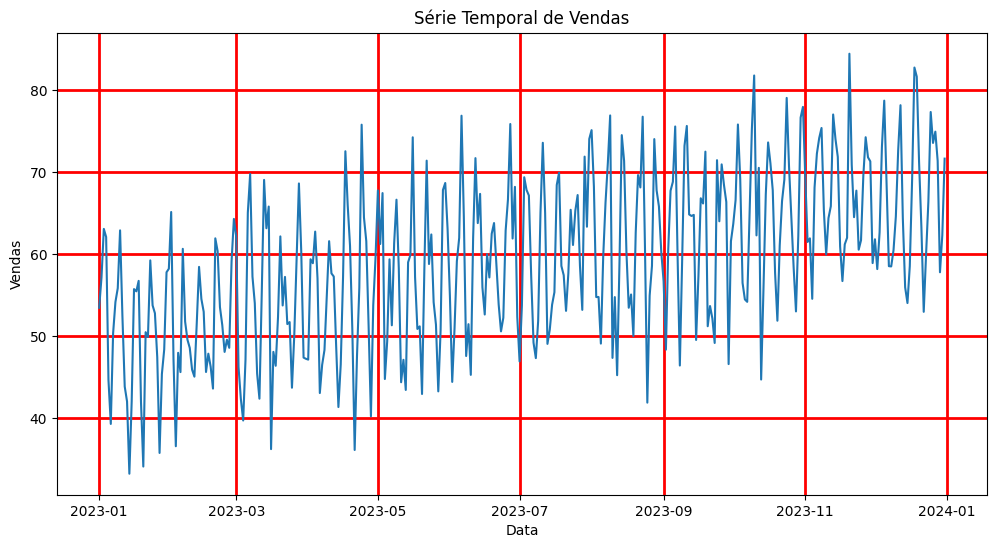

In [19]:
# Cria o gráfico da série temporal (sem formatação)
plt.figure(figsize =(12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True, color='r', linestyle='-', linewidth=2)
plt.show()

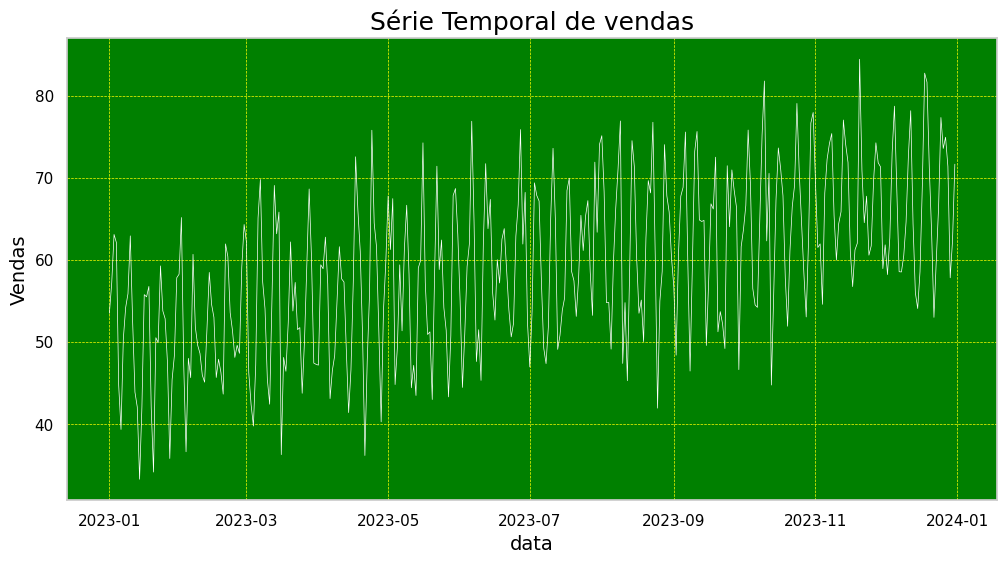

In [33]:
# Cria um gŕafico da série temporal (com formatação)

# Cria o gráfico da série temporal com layout de contrast
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = 'white', linewidth = 0.5)

# configurarar as cores e estilo do gráfico
plt.gca().set_facecolor('green')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# configurar rótulos dos eixoa título e legenda
plt.xlabel('data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color = 'black', fontsize = 14)
plt.title('Série Temporal de vendas', color = 'black', fontsize = 18)

#configurar as cores dos eixos dos ticks (Marcadores)
plt.tick_params(axis = 'x', colors = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

<Axes: xlabel='Data', ylabel='Total_Vendas'>

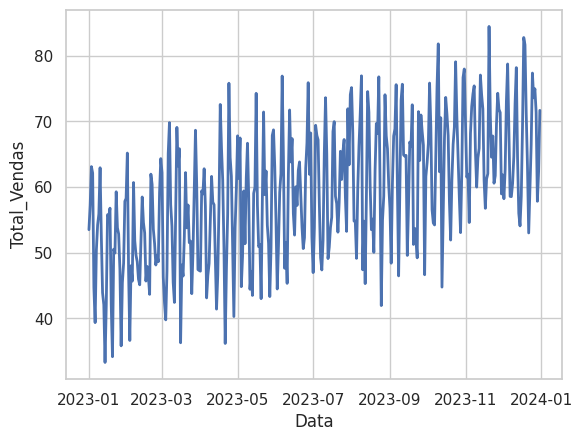

In [21]:

sns.set_theme(style="whitegrid")

sns.lineplot(data=serie_temporal,linewidth=2, sizes = (18, 10))

### Suaviazação Exponencial

A suavização exponencial é uma técnica de análise e previsão de séries temporais que aplica médias ponderadas aos dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. a suavização exponencial é útl para lidar com tendências e sazonalidades nos dados, e para reduzir o ruído.

### Suposições da suavização Exponencial
https://www.statsmodels.org/dev/generated/statsmodels_tsa.holwinters.SimpleExpSmoothing.html

No statsmodels, a classe simpleExpSmoothing é uma implementação da técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades.

O modelo simples ExpSmoothing do statsmodels, também conhecido como suavização explonecial simples ou kédia exponencialmente ponderada, é uma técnica de suavização de séries temporais que atribui pesos decrescentes exponencialmente aos pontos de dados passados. Ele é usado principalmente para suavizar séries temporais e fazer previsões de  curto prazo. As principais suposições do modelo simples ExpSmoothing são as seguintes:

 * A Série temporal é composta por um componente de nível(média) e um componente de erro aleatório (ruído). Não há compomentes de tendência ou sazonalidade na série.
 * O compomente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado.
 * O compomente de erro aléatório é normalmente distribuído com média zero e variância constante. Além disso, os erros são independentes e identicamente distribuidos.
 * O parâmetro de suavização (alfa) é uma constante entre  0 e 1, que determina a taxa de decaimenteo dos pesos, valores proximos de 1 dão maior peso aos dados mais relevantes, enquanto valores pródimos a 0 dão mais peso aos dados mais antigos.

 O modelo simpleExpSmoothing é uma ténica de suavização bastante simples que tem suas limitações. ele é mais adequado para séries temporais que não apresentam tendências ou sazonalidades, modelos mais avançados como o ExponentialSmoothing de Holt-winters ou modelos SARIMA pode ser mais apropriados.

In [22]:
#Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

Esta linha acima cria uma instância de  uma classe simpleExpSmoothing, utilizando a coluna "Vendas" da série serie temporal como entrada

In [24]:
# Trinamento (ajsute) do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

/home/allvjr/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Esta linha acima faz uma chamada ao método fi() para ajustar o modelo de suavização exponencial dos dados. O argumento smoothing_leval = 0.2 define o parâmetro de suavização (alfa) como 0.2. O parâmetro de suavização controla a rapidez com que os pesos descrecem ao longo do tempo; um avalor maior atribui mais peso aos dados recentes, enquanto um valor menor atribuiu mais peso aos dados mais antigos. O valor de alfa deve estar entre 0 e 1.

In [25]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

Esta alinha acima extrai os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, que são calculadas aplicando os pesos exponenciais aos dados históricos. Esses valores ajustados podem ser usados para analisar a série temporal suavizada, identificar tendências e comparar com outras técnicas de suavização oui previsão.

O resultado final é uma nova série temporal chamada suzavizacao_exponencial, que representa a versão suavizada da série original de vendas, com  menos ruído e flutuações de curto prazo.

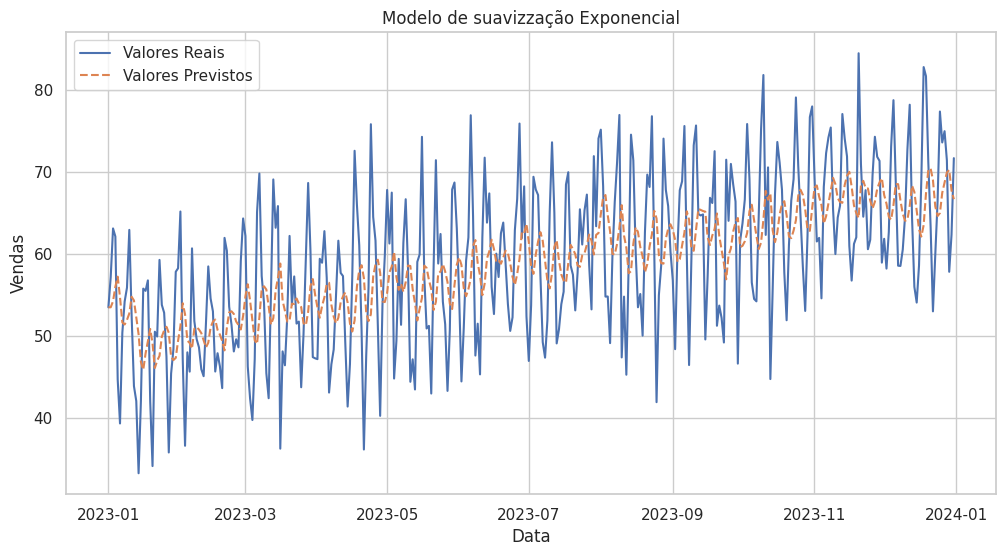

In [29]:
#plot
plt.figure(figsize = (12,6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de suavizzação Exponencial')
plt.legend()
plt.show()

### Deploy e Previsão com modelo Treinado

In [34]:
# Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [37]:
print('Previsão do total de Vendas para  Janeiro/2024: ', round(previsoes.iloc[0], 4))

Previsão do total de Vendas para  Janeiro/2024:  67.6499
